In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math

In [ ]:
IMAGE_PATH = r'/content/new_prescription.jpg'

###Code to read the text from prescription

In [ ]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

[([[92, 64], [238, 64], [238, 114], [92, 114]], 'Name', 0.9998654127120972),
 ([[285, 37], [509, 37], [509, 112], [285, 112]],
  'Sevitha',
  0.9996986900105952),
 ([[882, 41], [1218, 41], [1218, 94], [882, 94]],
  'Date: 9-12-22',
  0.9362010232744921),
 ([[67, 358], [284, 358], [284, 406], [67, 406]],
  'Disease :',
  0.6804221920575804),
 ([[318, 350], [462, 350], [462, 400], [318, 400]],
  'Feve <',
  0.8283640711122994),
 ([[57, 418], [288, 418], [288, 472], [57, 472]],
  'Medicine',
  0.9394905879254388),
 ([[299, 429], [319, 429], [319, 459], [299, 459]], "'", 0.6746335093822928),
 ([[354, 412], [477, 412], [477, 464], [354, 464]],
  'Dolo',
  0.9996201395988464),
 ([[496, 406], [592, 406], [592, 455], [496, 455]],
  '65 0',
  0.7596186399459839),
 ([[394, 484], [590, 484], [590, 534], [394, 534]],
  '2 €imes',
  0.5889105796489124),
 ([[620, 492], [654, 492], [654, 520], [620, 520]], '0', 0.980189950050331),
 ([[42, 492], [359, 492], [359, 561], [42, 561]],
  'frequency :',
  0

In [ ]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    top_left_int = []
    for number in top_left:
        top_left_int += [int(number)]
    bottom_right = tuple(detection[0][2])
    bottom_right_int = []
    for number in bottom_right:
        bottom_right_int += [int(number)]
    top_left_int = tuple(top_left_int)
    bottom_right_int = tuple(bottom_right_int)
    text = detection[1]
    print(text)
    list_text = []
    list_text.append(text)
    img = cv2.rectangle(img, top_left_int, bottom_right_int, (0, 255, 0), 3)
    #img = cv2.putText(img,text,(20,spacer), cv2.FONT_HERSHEY_SIMPLEX, 8,(0,255,0),2)
    spacer+=100

Name
Sevitha
Date: 9-12-22
Disease :
Feve <
Medicine
'
Dolo
65 0
2 €imes
0
frequency :
Doctoa
Sign
Ashinee
day


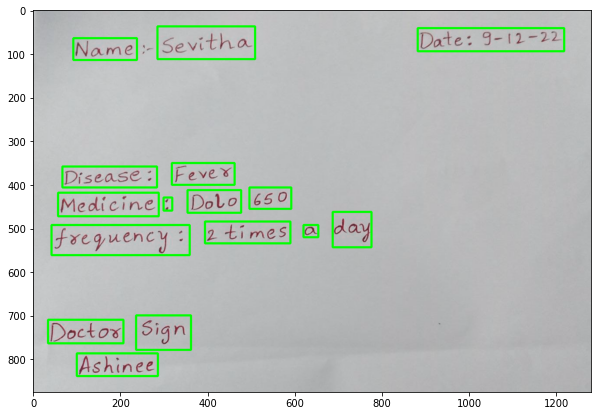

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
list_medicines = []
n = 0
while n != 19:
    list_medicines.append(data["Names"][n])
    n += 1

list_text = ["Mauli", "buscogast", "Ashinee", "Sevitha", "Eldoper"]
medicines_name = []
data = pd.read_csv("medicine_dataset.csv")
for index, text in enumerate(list_text):
    if text in list_medicines:
        medicines_name += [text]
print(medicines_name)

[]


### Code for the nearby hospitals

In [ ]:
# Coordinates of the location you want to search near
location = (74.7943, 13.0108)
# Search radius (in kilometers)
radius = 1
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("list_hospitals.csv")
# Calculate the distance between the location and each hospital
df["distance"] = ((df["latitude"] - location[0])**2 + (df["longitude"] - location[1])**2).apply(math.sqrt)

# Select only the hospitals that are within the search radius
nearby_hospitals = df[df["distance"] < radius]

# Print the name and address of each nearby hospital
for _, hospital in nearby_hospitals.iterrows():
    print(hospital["name"])
    print(hospital["address"])
    print(hospital["longitude"])


Padmavathi
XRR2+J4H, Opposite Mangalore City Corporation, Surathkal Overpass, Surathkal, Mangaluru, Karnataka 575014
13.003
 Chirashree Nursing Home, Surathkal
1-33/2 & 1-33/3, Iddya Suratkal,575014
12.99042
Srinivas Institute of Medical Sciences
2QCV+V69, Mukka, Surathkal, Mangaluru, Karnataka 574146
13.02206
